# COGS 108 - Final Project 

# Overview

Our project is focused on finding the relationship between income and health, this would confirm our findings from previous studies we researched. We are attempting to see if low income in households correlates to low health levels in the United States. We will look into how multiple factors, such as one’s socioeconomic status and daily food choices, can create health risk factors such as diabetes and obesity. 

# Names

- Amanda Ochoa
- Dustin Lamperts
- Minghan Guo
- Diana Torres
- Xiangjian(Aaron) Zeng 

# Group Members IDs

- A13912373
- A15748925
- A92068935
- A13656087
- A14827111
- A13501103

# Research Question

Are people with low socio-economic status more prone to health issues related to diet, such as diabetes and obesity?

## Background and Prior Work

The American Journal of Clinical Nutrition proposes the idea of a causal relation between socioeconomic status and diet quality, which inevitably weighs into the health of one’s life. Living off low wages makes it inevitably harder to access the right food products, which in turn leads to poor choices of food consumption. Nicole Darmon and Adam Drewnowski’s article,  “Does social class predict diet quality?” ,  not only explores the quality of food consumption but also the effects that it has on an individual’s health. Through observations and surveys, Darmon and Drewnowski were able to conclude that lower socioeconomic statuses typically resulted in an energy dense and nutrient poor diet- which refers to products such as hamburgers. This specific food group often leads to overconsumption and catalyzes health risks such as obesity and diabetes. There were also findings that those with a higher socio-economic status were more likely to choose whole grains, vegetables, and fruit. This is probably due to availability of product; whereas people with lower socioeconomic statuses are unable to attain these power foods because of limited accessibility to good product or because it is not affordable. When comparing food prices and diet costs, there was an evident positive correlation between the cost and quality of a product. Therefore, in order to acquire a healthy diet and lifestyle, it is a requirement to attain more money.

 Another article that sheds light onto the correlation between socio-economic status and quality of health is in Nancy Adler, W. Thomas Boyce, and other researchers. They mention in, “Socioeconomic Inequalities in Health: No Easy Solution”, that throughout history there has been an abundance of records and research that assert the relationships socioeconomic status has had. Their study primarily focused on gathering data about qualities that affect health outcomes across the span of many countries including: the United States and different regions in Europe. The null hypothesis was that socioeconomic status was not a factor in health outcomes and the primary cause of poor was if someone was insured or not. Adler and other researchers proposed that socioeconomic status was the driving factor for poorer health outcomes because of lack of resources and how it can affect an individual’s ability to engage in health promoting and disease preventing behaviors (Adler, 3144). The researchers are able to accept the alternative hypothesis by bringing in their evidence and case studies such as information gathered from Rhode Island. The Rhode Island information gives the following statistics: death rates for wealthier individuals was 10.8 per 1000 while those of a lower socioeconomic status had a death rate of 24.8 per 1000 (Adler, 3140). 

Although we agree with Adler and Darmon’s research, we sought out new information to better assert our hypothesis. We wished to find a dataset that was specified to the United States and something closer to our current timeline. This is when we found the Thirty Food Plan. The US Department of Agriculture’s study, Thirty Food Plan, is also mentioned and states that if families with lower incomes bought healthier foods it would take up about 35-40% of their income. 35-40% is a ludicrous amount that no person should have to sacrifice in order to lead a better lifestyle. Therefore, we can present the argument that the driving factor of maintaining a healthy diet is to have a higher socioeconomic status. This method is also a preventative measure against diseases and health risks.

References:
- 1) Nicole Darmon, Adam Drewnowski, Does social class predict diet quality?, The American Journal of Clinical Nutrition, Volume 87, Issue 5, May 2008, Pages 1107–1117, https://doi.org/10.1093/ajcn/87.5.1107
- 2) https://jamanetwork.com/journals/jama/articlepdf/406985/jama_269_24_031.pdf

# Hypothesis


People with a lower socio-economic status are more likely to develop health issues than those with a higher socioeconomic status. We reason that this is due to a lack of resources for healthier alternatives for food when you have a lower socio-economic status. 

# Dataset(s)

- Dataset Name: USDA Food Environment Atlas
- Link to the dataset: https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/
- Number of observations: 3143

We are using our dataset from United States Department of Agriculture Economic Research Service (USDA ERS), that was available for the public use. The dataset includes a total of 275 variables with each containing over 3100 observations, divided into 9 different spreadsheets. Each spreadsheet contains  relevant variables and observations that yields to important information about the food accessibility, availability of stores and restaurants nearby, availability of food assistance program (SNAP), food insecurity, taxes on food, availability of local foods, health status, and socio-economic status of people all over the U.S. from different backgrounds. The dataset we are using needs some modification, including data cleaning, merging multiple spreadsheets, and converting to one single csv file. 
    
    Below is a list of variables and detailed descriptions of each variable we used: 
- State
- County
- Fast Restaurants per 1000 People
- Percentage of Black People
- Percentage of White People
- Diabetes Rate
- Obesity Rate
- Median Income
- Poverty Rate

# Setup

In [96]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 18})

import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

### Loading the Data Set
Instead of importing the entire data set with over 200 variables, we cleaned up the data set first by selecting the variables we wanted and collecting them into one csv file.

In [2]:
# Import csv file
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,FIPS,State,County,FFRPTH14,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,MEDHHINC15,POVRATE15
0,1001,AL,Autauga,0.649878,77.246156,17.582599,2.400542,0.855766,13.0,34.1,56580.0,12.7
1,1003,AL,Baldwin,0.659634,83.504787,9.308425,4.384824,0.735193,10.4,27.4,52387.0,12.9
2,1005,AL,Barbour,0.818239,46.753105,46.691190,5.051535,0.389700,18.4,44.4,31433.0,32.0
3,1007,AL,Bibb,0.222163,75.020729,21.924504,1.771765,0.096007,14.8,40.3,40767.0,22.2
4,1009,AL,Blount,0.363832,88.887338,1.263040,8.070200,0.200621,14.1,34.6,50487.0,14.7


In [4]:
# Rename columns for easier use
df.columns = (['FIPS', 'state', 'county', 'fastfood', 'white', 'black', 'hispanic', 'asian', 'diabetes', 'obesity', 'income', 'poverty'])
df.head()

,FIPS,state,county,fastfood,white,black,hispanic,asian,diabetes,obesity,income,poverty
0,1001,AL,Autauga,0.649878,77.246156,17.582599,2.400542,0.855766,13.0,34.1,56580.0,12.7
1,1003,AL,Baldwin,0.659634,83.504787,9.308425,4.384824,0.735193,10.4,27.4,52387.0,12.9
2,1005,AL,Barbour,0.818239,46.753105,46.691190,5.051535,0.389700,18.4,44.4,31433.0,32.0
3,1007,AL,Bibb,0.222163,75.020729,21.924504,1.771765,0.096007,14.8,40.3,40767.0,22.2
4,1009,AL,Blount,0.363832,88.887338,1.263040,8.070200,0.200621,14.1,34.6,50487.0,14.7


In [5]:
df.shape

(3143, 12)

# Data Cleaning

We cleaned the dataset we found online to fit our project’s needs, which consisted of deleting any variables that didn’t have relevance to our project. We decided as a team on which variables were important for our analysis. Because the original file had 9 spreadsheets of data, and most of them were not relevant to our project, we decided to work with 28 out of 275 variables. We used the selected variables to create a new csv file and normalized income variables. We also omitted any null and negative values. Lastly, we limited the years of analysis to 2012-2015 to get the variables that we desired and to get a more relevant sample.

In [6]:
# Check how many data points have null data in any column'
null_rows = df.isnull().any(axis=1).sum()
null_rows

4

In [162]:
# The data set uses "-9999" as a signal for null data
# Find any cells that have this kind of null data
null_rows = df[df.values == "-9999"].any(axis=1).sum()
null_rows

0

In [163]:
# Drop any cells that have null data
df = df.dropna()
df.shape

(3139, 16)

# Data Analysis & Results

## Descriptive Analysis

We used a scatter_matrix to get a general sense of what variables have larger correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16840748>,
      dtype=object)

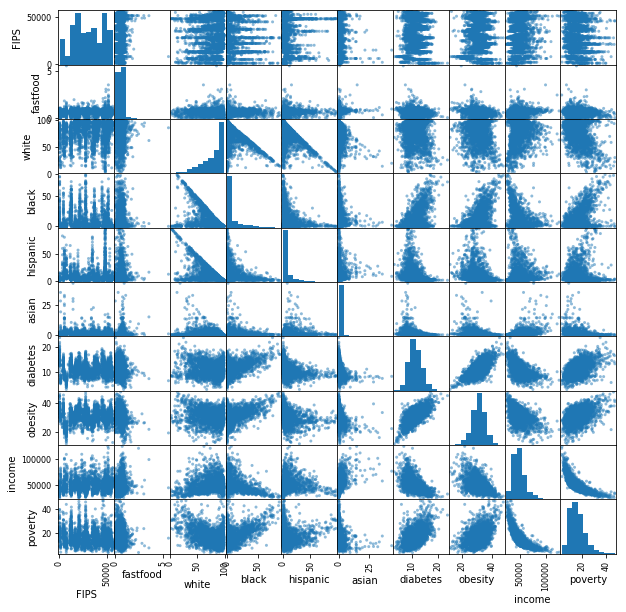

In [9]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))

In [10]:
df.describe()

,FIPS,fastfood,white,black,hispanic,asian,diabetes,obesity,income,poverty
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,30392.532972,0.576744,78.360313,8.753403,8.292461,1.135387,11.236763,31.015833,48611.206117,16.260975
std,15156.298611,0.305546,19.787545,14.426701,13.196929,2.468433,2.482565,4.517109,12351.988288,6.442319
min,1001.000000,0.000000,2.860408,0.000000,0.000000,0.000000,3.300000,11.800000,22894.000000,3.400000
25%,18180.000000,0.413322,67.014549,0.400913,1.594090,0.270060,9.500000,28.300000,40438.000000,11.500000
50%,29177.000000,0.578052,85.774059,1.907184,3.285739,0.463388,11.100000,31.200000,46807.000000,15.200000
75%,45080.000000,0.732873,94.180771,9.732428,8.235463,0.985868,12.900000,33.800000,54164.000000,19.700000
max,56045.000000,5.555556,99.163180,85.438778,95.744774,43.014686,23.500000,47.600000,125900.000000,47.400000


[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Poverty Rate (%)')]

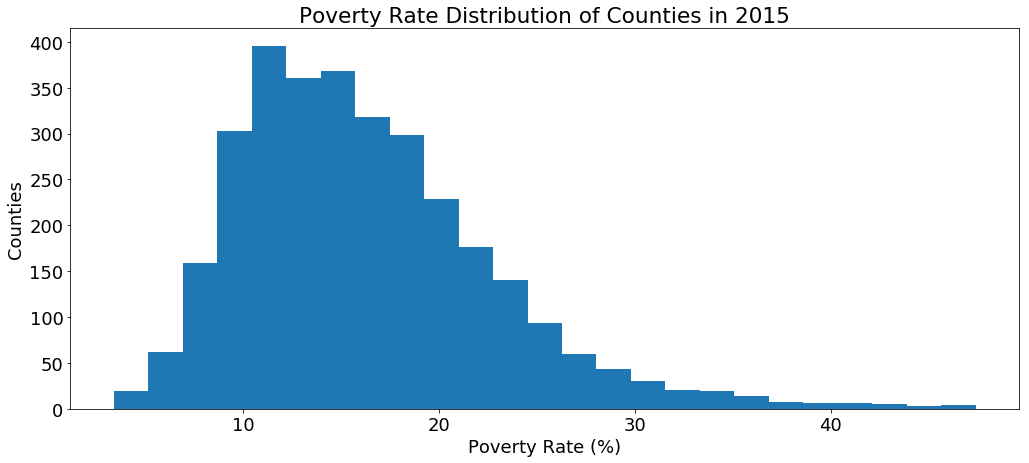

In [159]:
"""
    Poverty rate distribution of Counties 2015: The data in figure one was gathered
    from a 2015 sample that spanned across the counties of the United States. These
    counties were used many times throughout the course of this project. This
    histogram is meant to show the poverty rate distribution throughout the counties,
    with poverty being measured by who is above or below the average income level in
    the counties. The majority of the counties lie between 10 and 20% for poverty
    rate with a very sparse amount going over 30%. 

"""

ax_pr=df['poverty'].plot.hist(bins=25,title='Poverty Rate Distribution of Counties in 2015')
ax_pr.set(xlabel="Poverty Rate (%)", ylabel="Counties")
#mean:16.260975 std:6.442319

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Income')]

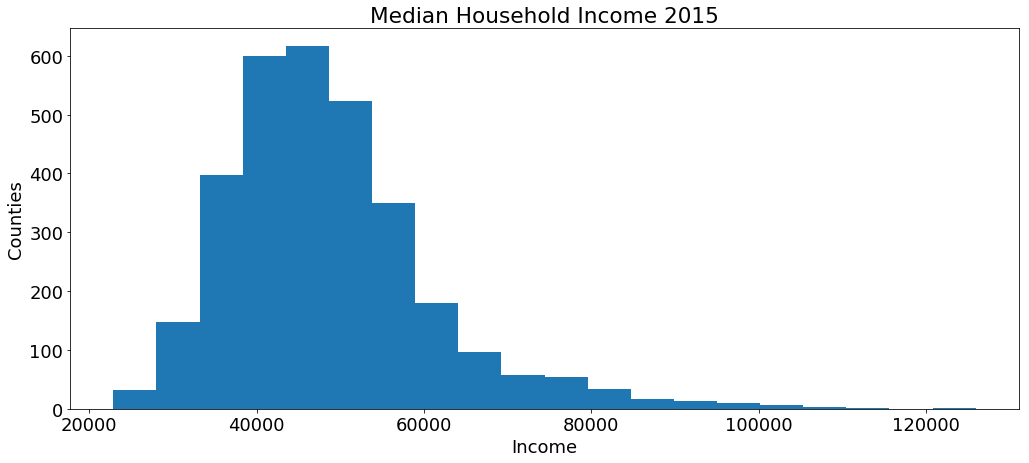

In [160]:
"""
    Figure 2 is a histogram that represents the average income per household
    across the U.S. in 2015. According to the histogram, most income is
    distributed within 40,000 to 50,000 US dollars. The histogram is positively
    skewed because majority of incomes are distributed between 20,000 and 60,000
    US dollars while there are very few that are distributed above 60,000 US
    dollars.

"""
ax_pr=df['income'].plot.hist(bins=20,title='Median Household Income 2015')
ax_pr.set(xlabel="Income", ylabel="Counties")
#mean:48611.206117 std:12351.988288

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Adult Obesity Rate Rate (%)')]

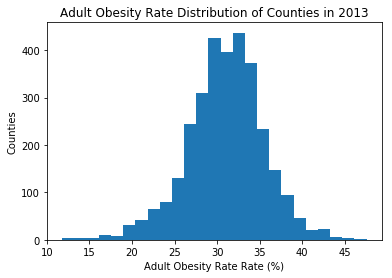

In [13]:
ax_pr=df['obesity'].plot.hist(bins=25,title='Adult Obesity Rate Distribution of Counties in 2013')
ax_pr.set(xlabel="Adult Obesity Rate Rate (%)", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Adult Diabetes Rate Rate (%)')]

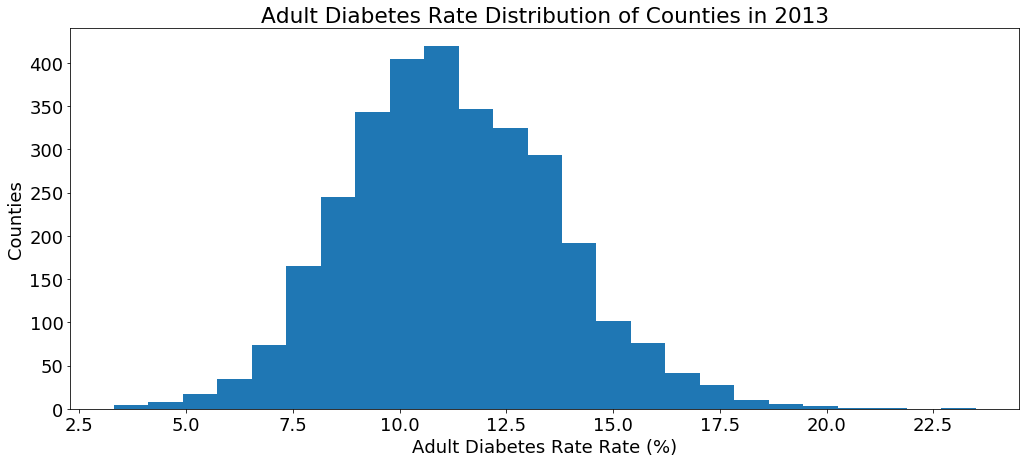

In [161]:
ax_pr=df['diabetes'].plot.hist(bins=25,title='Adult Diabetes Rate Distribution of Counties in 2013')
ax_pr.set(xlabel="Adult Diabetes Rate Rate (%)", ylabel="Counties")

The histogram shown below, Fig. 5, represents the comparison of number of fast food restaurants and every 1000 people per county. As you can see from the graph, most counties averaged about 0.75 restaurants for every 1000 people. Since it is a uniform distribution, we expect each county to have equal amounts of fast food chains, which will prevent skewed data. We do notice some outlier counties that have a little over half of the average, over 1.5, however we are not worried about this because it looks like a minimal amount. Just by looking at the histogram, we are confident that any data collected and compared with fast food 

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Fast Food Restaurants')]

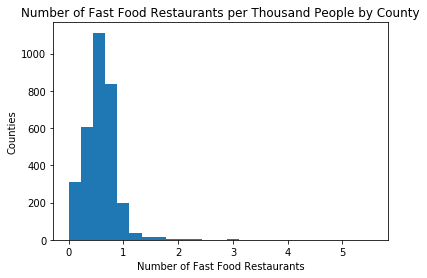

In [15]:
ax_pr=df['fastfood'].plot.hist(bins=25,title='Number of Fast Food Restaurants per Thousand People by County')
ax_pr.set(xlabel="Number of Fast Food Restaurants", ylabel="Counties")

In [16]:
# Transform the fast food data using a square root transform to make it more normal
df['fastfood10'] = df['fastfood']
df['fastfood10'] = df['fastfood10'].transform(np.sqrt)

[Text(0, 0.5, 'Counties'),
 Text(0.5, 0, 'Number of Fast Food Restaurants per 1000 ppl')]

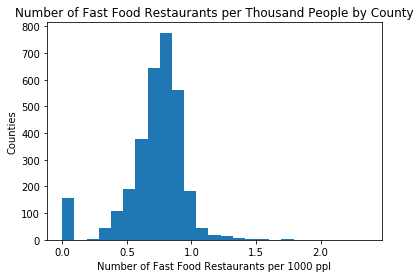

In [17]:
ax_pr=df['fastfood10'].plot.hist(bins=25,title='Number of Fast Food Restaurants per Thousand People by County')
ax_pr.set(xlabel="Number of Fast Food Restaurants per 1000 ppl", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of White People')]

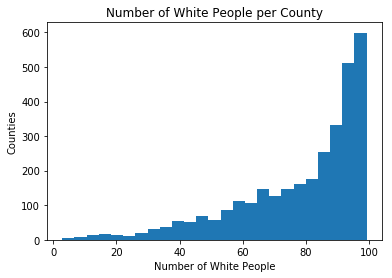

In [18]:
ax_pr=df['white'].plot.hist(bins=25,title='Number of White People per County')
ax_pr.set(xlabel="Number of White People", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Black People')]

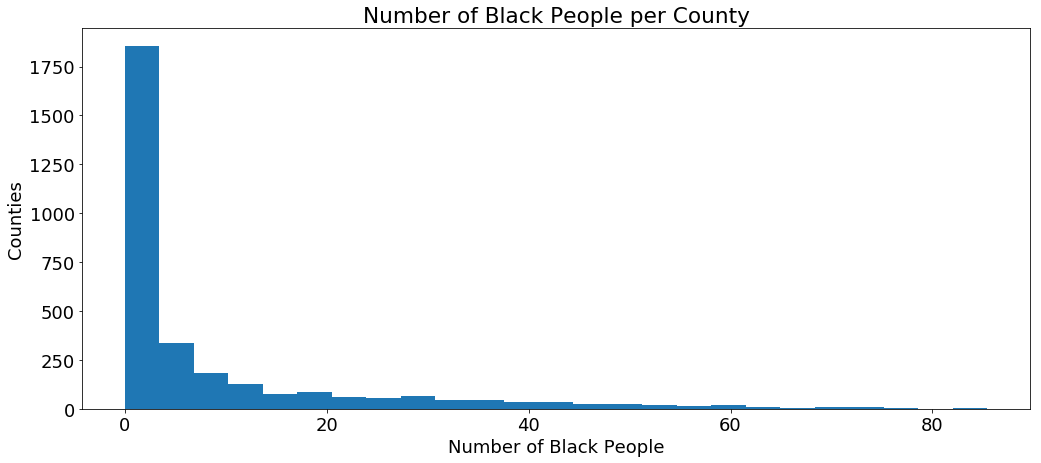

In [153]:
ax_pr=df['black'].plot.hist(bins=25,title='Number of Black People per County')
ax_pr.set(xlabel="Number of Black People", ylabel="Counties")

In [23]:
race_df['black10'] = race_df['black']
race_df['black10'] = race_df['black10'].transform(np.sqrt)
race_df['black10'] = race_df['black10'].transform(np.log10)

/Users/dustinlamperts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dustinlamperts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dustinlamperts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Black People')]

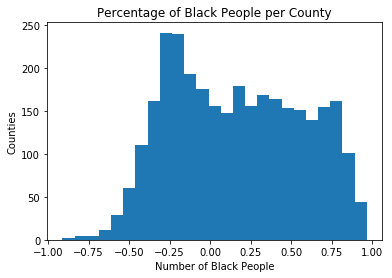

In [24]:
ax_pr=race_df['black10'].plot.hist(bins=25,title='Percentage of Black People per County')
ax_pr.set(xlabel="Number of Black People", ylabel="Counties")

In [154]:
df['income10'] = df['income']
df['income10'] = df['income10'].transform(np.log10)

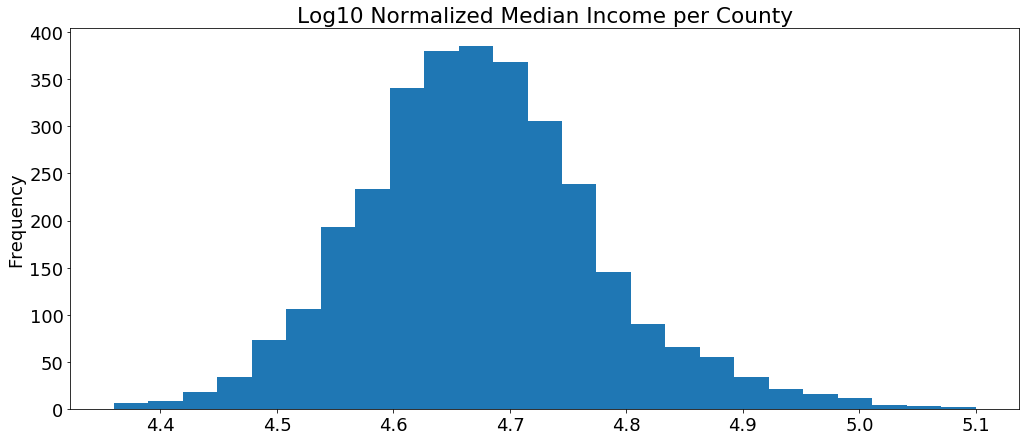

In [157]:
df['income10'].plot.hist(bins=25, title='Log10 Normalized Median Income per County')

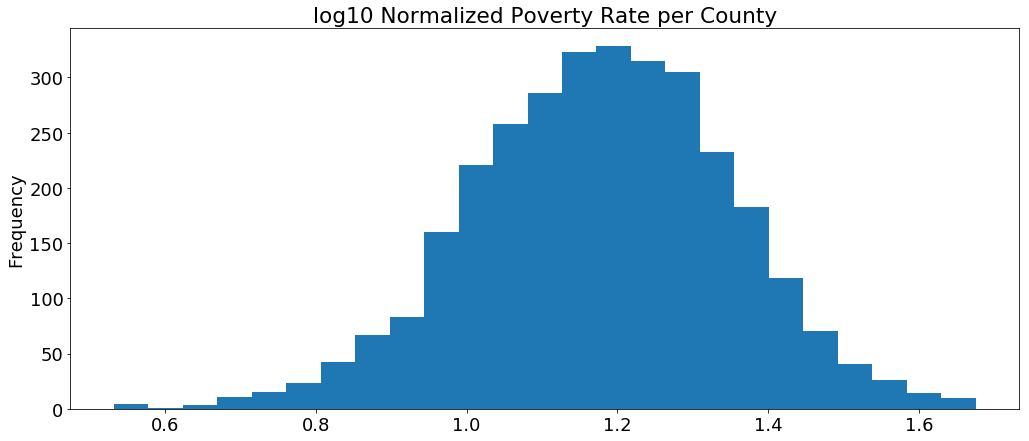

In [158]:
df['poverty10'] = df['poverty']
df['poverty10'] = df['poverty10'].transform(np.log10)
df['poverty10'].plot.hist(bins=25, title='log10 Normalized Poverty Rate per County')

## Exploratory Analysis

The largest correlation we found is between income and obesity

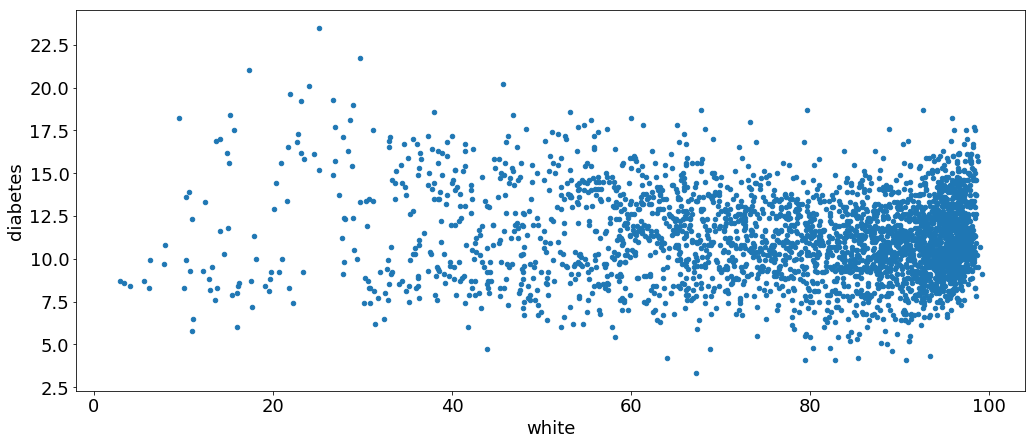

In [132]:
df.plot.scatter('white', 'diabetes')

### Diabetes and Income
The most immediate connection that we made in analyzing the data is between diabetes and income. There is more of a connection between income and diabetes than between diabetes and obesity. People can be obese without having diabetes and vice-versa. The correlation factore between diabetes and income is about $-14.66/100 = -0.1466$.

There was a correlation between the percentage of black people in a county and the rate of diabetes, but the distribution for percentage of black people in a county was highly skewed to the left and difficult to normalize. Because of this, we split the data of the black population at the mean, which is 8.753403, using a value of 1.0 for those counties above the mean and 0.0 for those below. We did a scatter plot of diabetes and income with the two colors based on the percentage of black people in each county.

In [141]:
# Do a linear regression, predicting diabetes from income

outcome, predictors = patsy.dmatrices('diabetes ~ income10', df)
mod = sm.OLS(outcome, predictors)

## fit the model
res = mod.fit()

## look at the results
print(res.summary())

# P-Value: 0
# B_0: 79.7415
# B_1: -14.6562

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1843.
Date:                Sat, 08 Jun 2019   Prob (F-statistic):          3.47e-317
Time:                        23:11:07   Log-Likelihood:                -6582.4
No. Observations:                3139   AIC:                         1.317e+04
Df Residuals:                    3137   BIC:                         1.318e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.7415      1.596     49.961      0.0

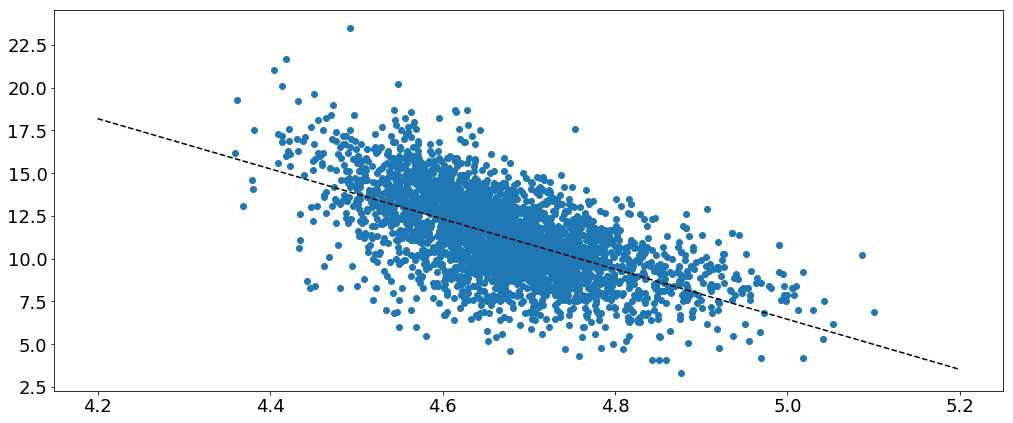

In [142]:
# Scatter plot of income and diabetes with the best fit line

plt.scatter(df['income10'], df['diabetes'])

xs = np.arange(4.2, 5.5)
ys = -14.65621559 * xs + 79.74152135
plt.plot(xs, ys, '--k', )
plt.show()

In [136]:
# Define function that splits percentage of black people per county

def split_by_mean(percentage):
    """
        Assigns value of 1.0 to counties with a black population above mean
        and value of 0.0 to counties below the mean.
    """
    if percentage < 8.753403:
        return 0.0
    else:
        return 1.0
    
df['black_split'] = [split_by_mean(percent) for percent in race_df['black']]

In [143]:
# Linear regression prediction diabetes rate from income and black population

outcome, predictors = patsy.dmatrices('diabetes ~ income10 + black_split', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

# P-Value:
# B_0: 
# B_1:

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1133.
Date:                Sat, 08 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:13   Log-Likelihood:                -6454.5
No. Observations:                3139   AIC:                         1.291e+04
Df Residuals:                    3136   BIC:                         1.293e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      74.2981      1.568     47.371      

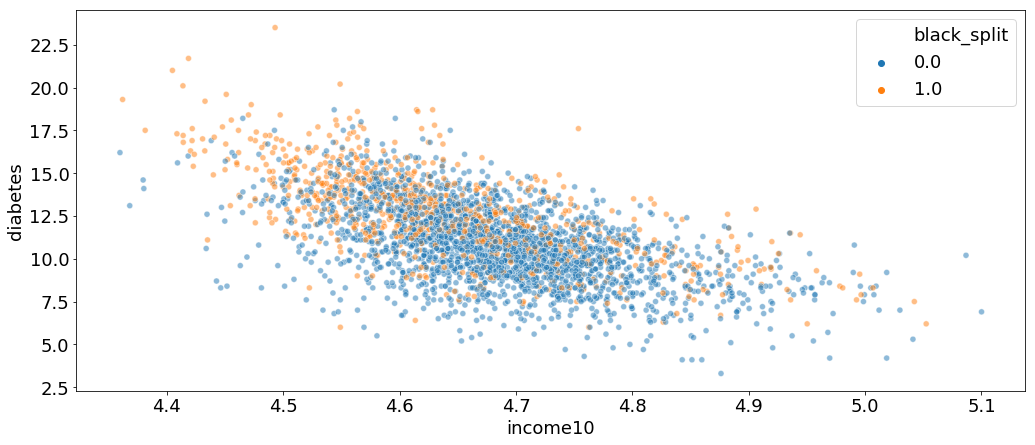

In [138]:
sns.scatterplot(x='income10', y='diabetes', hue='black_split', data=df, alpha=.5);

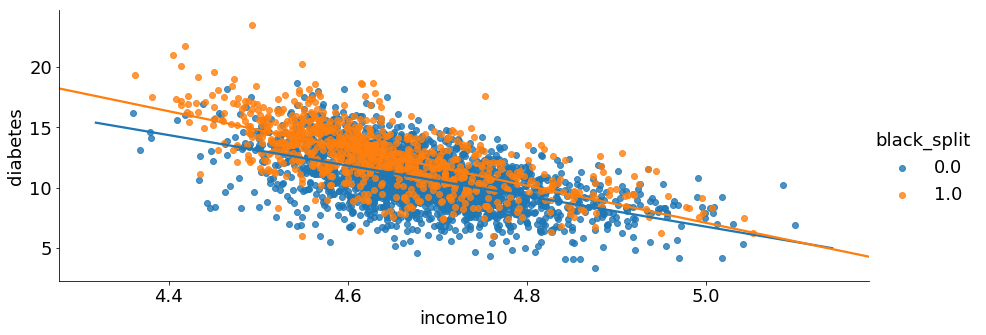

In [149]:
# plot with regression line
sns.lmplot(x='income10', y='diabetes', hue='black_split', data=df, ci=None, aspect=2.5);

In [119]:
outcome, predictors = patsy.dmatrices('obesity ~ poverty10', df)
mod = sm.OLS(outcome, predictors)

## fit the model
res = mod.fit()

## look at the results
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     599.9
Date:                Sat, 08 Jun 2019   Prob (F-statistic):          2.20e-121
Time:                        17:07:34   Log-Likelihood:                -8912.1
No. Observations:                3139   AIC:                         1.783e+04
Df Residuals:                    3137   BIC:                         1.784e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.4807      0.517     35.741      0.0

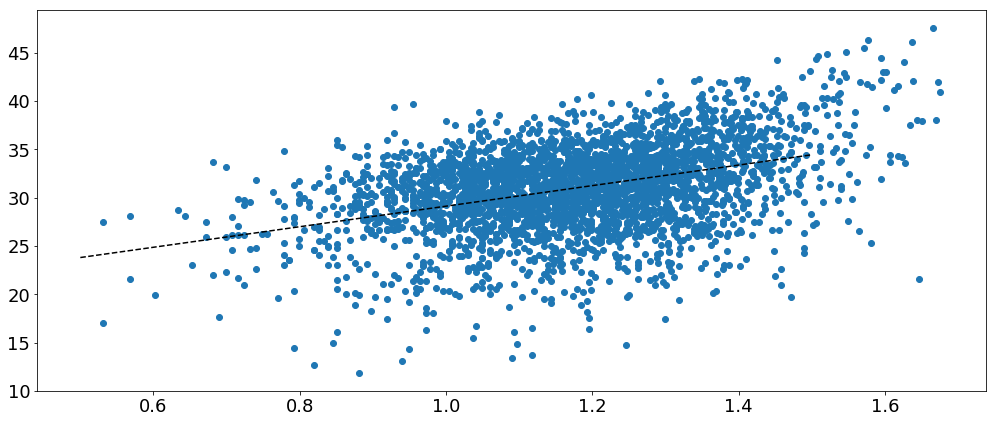

In [124]:
plt.scatter(df['poverty10'], df['obesity'])

xs = np.arange(.5, 2.0)
ys = 10.6371 * xs + 18.4807
plt.plot(xs, ys, '--k', )
plt.show()

In [122]:
outcome, predictors = patsy.dmatrices('diabetes ~ poverty10', df)
mod = sm.OLS(outcome, predictors)

## fit the model
res = mod.fit()

## look at the results
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     1264.
Date:                Sat, 08 Jun 2019   Prob (F-statistic):          7.47e-233
Time:                        17:14:48   Log-Likelihood:                -6776.6
No. Observations:                3139   AIC:                         1.356e+04
Df Residuals:                    3137   BIC:                         1.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0236      0.262      7.727      0.0

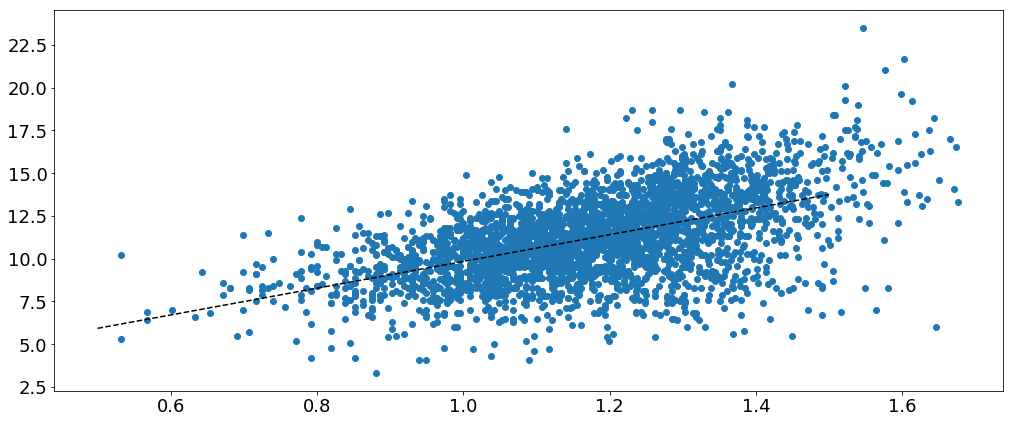

In [123]:
plt.scatter(df['poverty10'], df['diabetes'])

xs = np.arange(.5, 2)
ys = 7.8182 * xs + 2.0236
plt.plot(xs, ys, '--k', )
plt.show()

### Diabetes and Fast Food
Surprisingly, the data shows that there is little correlation between the number of fast food restaurants per 1000 people in a county and the rate of diabetes. The rate of diabetes is pretty evenly distributed among counties that have no fast food restaurants so we dropped counties with zero fast food restaurants as well as couple of outliers above 1.5 fast food restaurants per 1000 people.

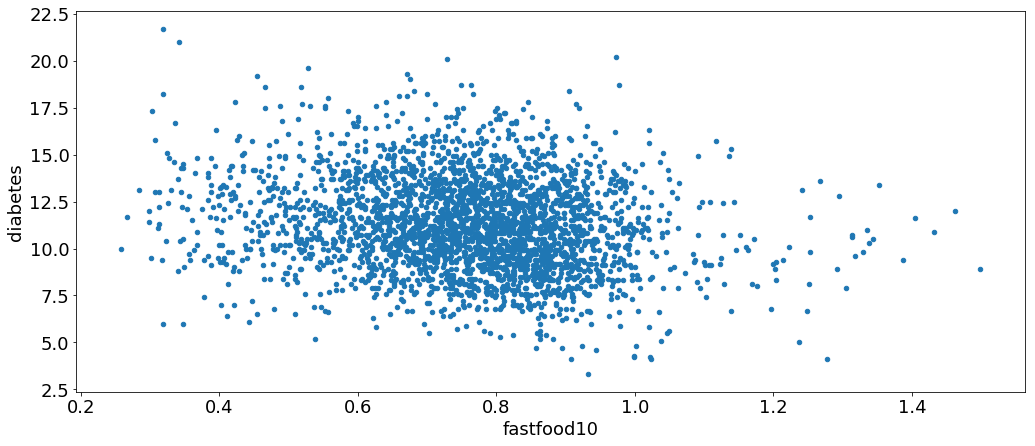

In [128]:
# Drop rows with zero fast food restaurants
df2 = df[df['fastfood10'] > 0]
df2 = df2[df2['fastfood10'] < 1.5]
df2.plot.scatter('fastfood10', 'diabetes')

In [150]:
#

outcome, predictors = patsy.dmatrices('diabetes ~ fastfood10', df)
mod = sm.OLS(outcome, predictors)

## fit the model
res = mod.fit()

## look at the results
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     37.33
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           1.12e-09
Time:                        23:18:35   Log-Likelihood:                -7289.3
No. Observations:                3139   AIC:                         1.458e+04
Df Residuals:                    3137   BIC:                         1.459e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0689      0.143     84.306      0.0

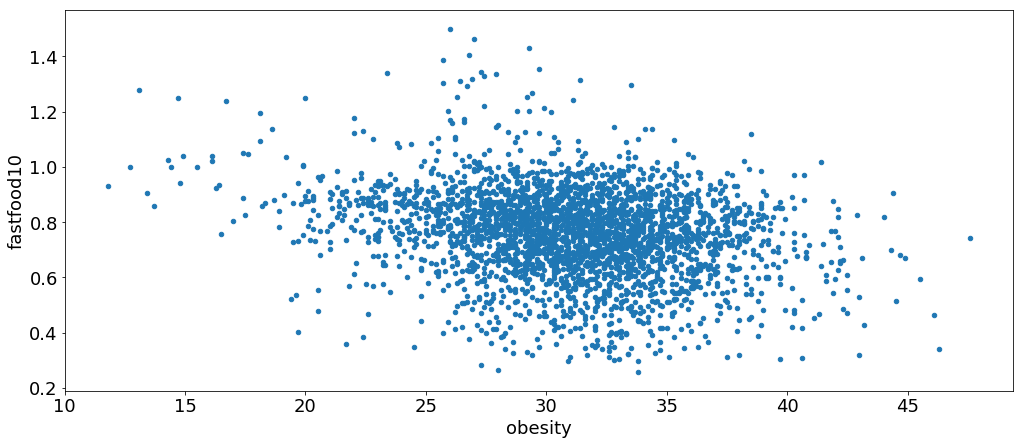

In [130]:
df2.plot.scatter('obesity', 'fastfood10')

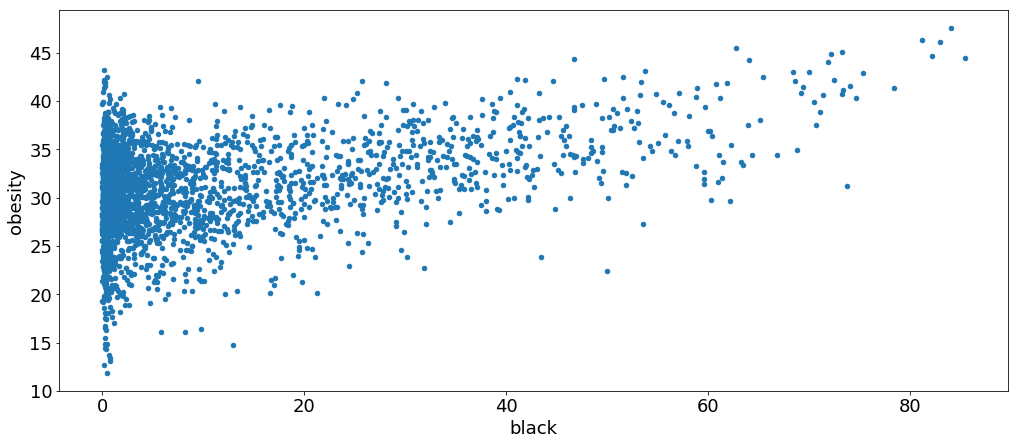

In [151]:
df.plot.scatter('black', 'obesity')

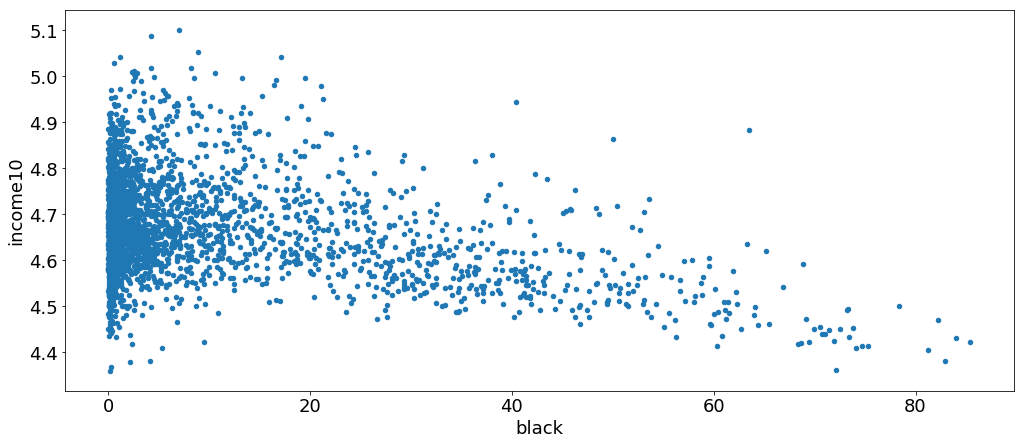

In [152]:
df.plot.scatter('black', 'income10')

# Ethics & Privacy

The data was published for the public use by the United States Department of Agriculture. Since the data was released publicly it is accessible for us to use without limitations. The data was gathered with the knowledge and consent of participants, who were made aware of potential future uses of the data gathered. Our goal in analyzing this data is to help spread awareness of the lack of access to healthy food for people with lower socioeconomic status and to help increase access to healthy food for those people. By this we are not making the claim that all people in a low socioeconomic class are unhealthy but rather trying to see if there is a correlation in the majority of the population.

The data gathered was meant to assemble statistics on food environment indicators to stimulate on the determinants of food choices and diet quality. It was also meant to provide an overview of community's ability to access healthy food. The way this data was gathered should not affect the impact of our analysis. Since we are using this data to find correlations between socioeconomic status and health our analysis should not have been affected by the way the data was gathered. To limit the amount of bias towards certain states or groups we focused on income and health  in a variety of states and their access to certain foods/ resources. 

Add possible bias that might have affected data collection (for instance, their data might be biased so our data might be biased as well)

# Conclusion & Discussion

This project aimed to observe the relationship between socioeconomic status and health. We predicted that people with low socioeconomic status will be more prone to health issues such as diabetes and obesity due to lack of access to healthy food choices. To test our hypothesis, we looked at the distribution of fast food restaurants across different socioeconomic status and prevalence rate of diabetes and obesity across the United States. Our results show that there is a strong correlation between socioeconomic status and health, as people from lower socioeconomic status had higher diabetes and obesity rate. However, 


Although we predicted that low income households would be more prone to health issues due to their food choices, we observed that there was no correlation between income and fast food consumption across different socioeconomic status. One’s socioeconomic status did not influence one’s food choices since the fast food restaurants were available equally across all socioeconomic statuses. However, the prevalence rate for health related problems were more prominent in low socioeconomic status households. We conclude that there are other factors 


Limitations: As with any project, we encountered some limitations through the duration of these past 10 weeks. One of the limitations we had was that our variables were not consistent throughout the three years of analysis. For example, when we were correlating the poverty rate versus obesity rate, the poverty rate variable was extracted from data in 2015 and obesity data was taken from 2013.  However, we would assume that this information was fixed and generalized to the other years of analysis. Another problem we had when gathering our data was attaining a large enough dataset with variables that matched our hypothesis and research question. Since we are students we only have a limited access to sources, in comparison to real life data scientists who can choose from a plethora of data. 
Confounding variables: Through the duration of this project we assumed that there would be a correlation with fast food consumption, which was measured by number of sales, and income. However, what we later found was that fast food was equally consumed through all levels of income. This could have hindered our original hypothesis which we worried about. Another possible confounding finding was discovered when we became curious of the relationship between race and health risks such as obesity and diabetes. The data showed that if you were african american, you were more likely to develop these unhealthy risk factors across the board despite your socio-economic status. This was not true for the caucasion population. We believe that race is a confounding variable because it can skew the data. Instead of socio-economic status being the driving factor for being at health risk, we now see that race plays a more important role.